# Segmentation of Cells On Microscope Images using UNet

## 0. Imports and install packeges

In [21]:
import torch
import torchvision
from torchvision import datasets
import zipfile

## 1. Get the dataset

### 1.1 Donwload images

In [17]:
dataset_path_zip = '/content/images.zip'
zipfile.ZipFile(dataset_path_zip).extractall('/content/')

In [18]:
# 5% of the train annotations
!wget http://livecell-dataset.s3.eu-central-1.amazonaws.com/LIVECell_dataset_2021/annotations/LIVECell_dataset_size_split/2_train5percent.json

# Validation and Test annotations
!wget http://livecell-dataset.s3.eu-central-1.amazonaws.com/LIVECell_dataset_2021/annotations/LIVECell/livecell_coco_val.json
!wget http://livecell-dataset.s3.eu-central-1.amazonaws.com/LIVECell_dataset_2021/annotations/LIVECell/livecell_coco_test.json

--2024-02-01 15:08:48--  http://livecell-dataset.s3.eu-central-1.amazonaws.com/LIVECell_dataset_2021/annotations/LIVECell_dataset_size_split/2_train5percent.json
Resolving livecell-dataset.s3.eu-central-1.amazonaws.com (livecell-dataset.s3.eu-central-1.amazonaws.com)... 52.219.171.118, 3.5.139.34, 3.5.137.142, ...
Connecting to livecell-dataset.s3.eu-central-1.amazonaws.com (livecell-dataset.s3.eu-central-1.amazonaws.com)|52.219.171.118|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27988522 (27M) [application/json]
Saving to: ‘2_train5percent.json.1’

2_train5percent.jso 100%[===================>]  26.69M  10.7MB/s    in 2.5s    

2024-02-01 15:08:51 (10.7 MB/s) - ‘2_train5percent.json.1’ saved [27988522/27988522]



loading annotations into memory...
Done (t=1.32s)
creating index...
index created!


### 1.2 Instanciate datasets and Visualizing random images of dataset

In [40]:
# Train, Val and Test images and annotation paths
train_dataset_image_root_path = '/content/images/livecell_train_val_images'
train_dataset_annotations_root_path = '/content/2_train5percent.json'

val_dataset_image_root_path = '/content/images/livecell_train_val_images'
val_dataset_annotations_root_path = 'livecell_coco_val.json'

test_dataset_image_root_path = '/content/images/livecell_test_images'
test_dataset_annotations_root_path = '/content/livecell_coco_test.json'

In [41]:
train_dataset = datasets.CocoDetection(root=train_dataset_image_root_path, annFile=train_dataset_annotations_root_path)
val_dataset = datasets.CocoDetection(root=train_dataset_image_root_path, annFile=val_dataset_annotations_root_path)

loading annotations into memory...
Done (t=1.10s)
creating index...
index created!
loading annotations into memory...
Done (t=15.11s)
creating index...
index created!


In [42]:
train_dataset, val_dataset

(Dataset CocoDetection
     Number of datapoints: 162
     Root location: /content/images/livecell_train_val_images,
 Dataset CocoDetection
     Number of datapoints: 570
     Root location: /content/images/livecell_train_val_images)

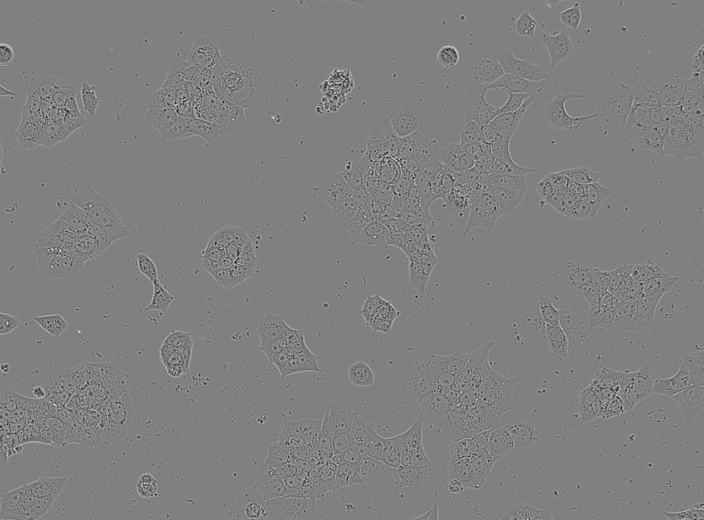

In [38]:
train_dataset[2][0]

### 1.3 Visualizing the maks segmentation

### 1.4 Visualizing random images and its respective masks